## Dataset Information

This dataset allows you to study, analyze and recognize elements in the images. That’s exactly how your camera detects your face, using image recognition! It’s a digit recognition problem. This data set has 49,000 images of 28 X 28 size, totalling 49 MB.

## Import Modules

In [3]:
#!pip install tensorflow-gpu keras

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

D:\shanu_user\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\shanu_user\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\shanu_user\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Unzip the train data|

In [2]:
# !unzip Train_UQcUa52.zip

## Load the data

In [3]:
df = pd.read_csv('train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [4]:
!pwd

/d/Notebooks/xyz/Deep-Learning-Projects/MNIST Handwritten Digits Recognition - Image Classification


In [5]:
image_path = 'Images/train/'

In [6]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [9]:
y = df['label']

In [10]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


## Exploratory Data Analysis

4


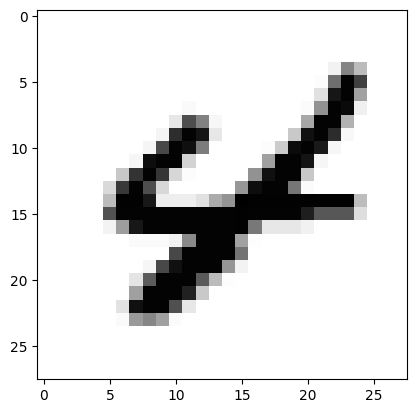

In [11]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

2


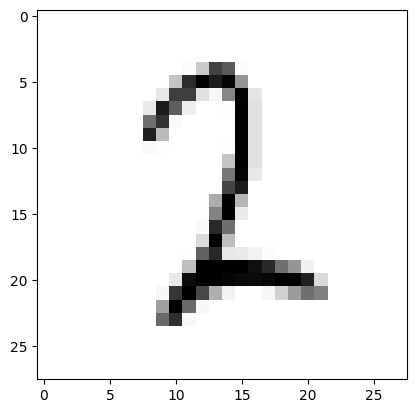

In [12]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

7


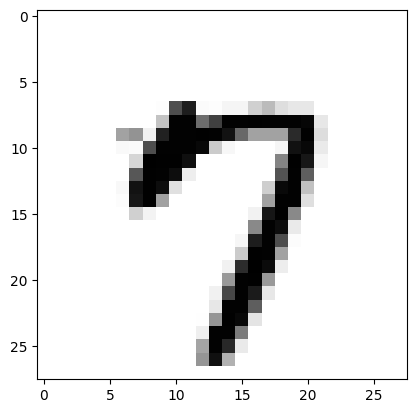

In [13]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

## Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

## Normalization

In [15]:
x_train[0]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [16]:
x_train /= 255
x_test /= 255

In [17]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## Model Creation

In [18]:
input_shape = (28,28,1)
output_class = 10

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [20]:
# train the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
1149/1149 [==============================] - 52s 43ms/step - loss: 0.2868 - accuracy: 0.9133 - val_loss: 0.1224 - val_accuracy: 0.9638
Epoch 2/30
1149/1149 [==============================] - 53s 46ms/step - loss: 0.1215 - accuracy: 0.9626 - val_loss: 0.0865 - val_accuracy: 0.9731
Epoch 3/30
1149/1149 [==============================] - 47s 41ms/step - loss: 0.0857 - accuracy: 0.9736 - val_loss: 0.0793 - val_accuracy: 0.9758
Epoch 4/30
1149/1149 [==============================] - 40s 35ms/step - loss: 0.0661 - accuracy: 0.9790 - val_loss: 0.0682 - val_accuracy: 0.9784
Epoch 5/30
1149/1149 [==============================] - 39s 34ms/step - loss: 0.0534 - accuracy: 0.9823 - val_loss: 0.0734 - val_accuracy: 0.9793
Epoch 6/30
1149/1149 [==============================] - 40s 35ms/step - loss: 0.0428 - accuracy: 0.9860 - val_loss: 0.0643 - val_accuracy: 0.9811
Epoch 7/30
1149/1149 [==============================] - 52s 45ms/step - loss: 0.0398 - accuracy: 0.9871 - val_loss: 0.0658 -

## Testing the model

1/1 [==============================] - 2s 2s/step
Predicted output: 1


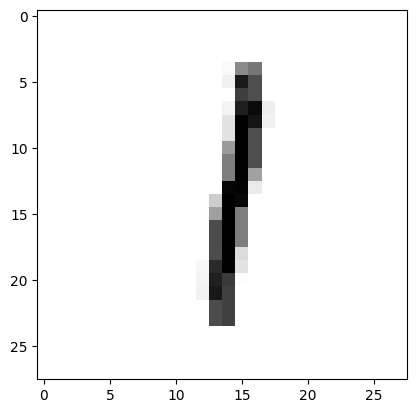

In [21]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

1/1 [==============================] - 0s 42ms/step
Predicted output: 8


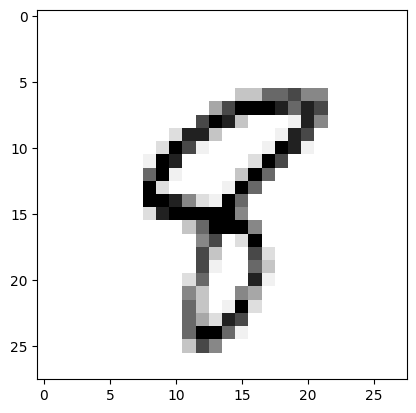

In [22]:
image_index = 100
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())